In [74]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv("US_Accidents_March23.csv", nrows = 1000000)
#this csv file size is large so only take sample of 1000000 rows

In [131]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [132]:
df['State']

0         OH
1         OH
2         OH
3         OH
4         OH
          ..
999995    FL
999996    FL
999997    FL
999998    FL
999999    FL
Name: State, Length: 1000000, dtype: object

In [133]:
print("Number of columns: ",len(df.columns))
print("Number of rows: ",len(df))

Number of columns:  46
Number of rows:  1000000


In [134]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1000000
End_Lng                  1000000
Distance(mi)                   0
Description                    1
Street                      1712
City                          28
County                         0
State                          0
Zipcode                      136
Country                        0
Timezone                     451
Airport_Code                1432
Weather_Timestamp           9927
Temperature(F)             15298
Wind_Chill(F)             460589
Humidity(%)                16553
Pressure(in)               12376
Visibility(mi)             18931
Wind_Direction             13570
Wind_Speed(mph)           100398
Precipitation(in)         475316
Weather_Condition          18211
Amenity                        0
Bump      

In [135]:
df.City.unique()

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Vaughnsville',
       'Shasta Lake', 'North Stratford'], dtype=object)

In [136]:
cities = df.City.unique()
len(cities)

8742

In [137]:
#Getting the number of accidents in each city over all years (2016-2020)
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

City
Houston         39763
Dallas          28160
Los Angeles     26561
Austin          22988
Atlanta         14400
Charlotte       13969
Orlando         11322
Miami           10874
Sacramento      10647
San Diego        8311
Seattle          8286
San Antonio      7938
Omaha            7765
Dayton           7730
Grand Rapids     6917
San Jose         6844
Raleigh          6091
Nashville        5807
Tampa            5786
Chicago          5763
Name: count, dtype: int64

<Axes: ylabel='City'>

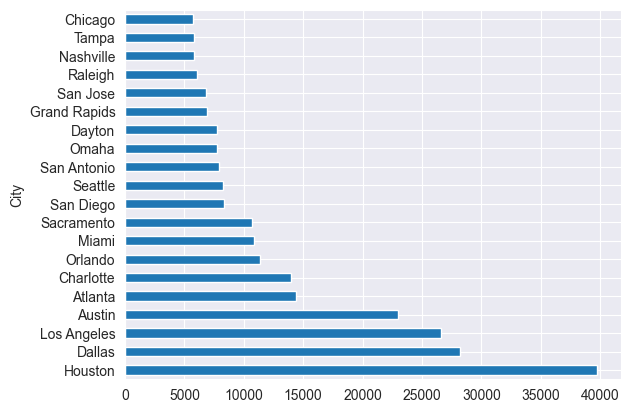

In [138]:
cities_by_accident[:20].plot(kind='barh')

C:\Users\dankh\AppData\Local\Temp\ipykernel_33132\3405282844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='count', ylabel='Density'>

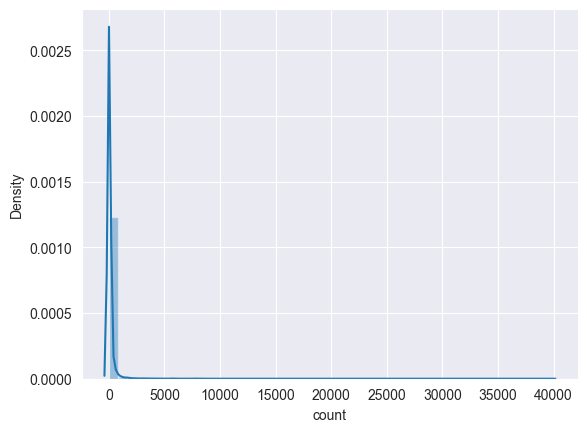

In [139]:
sns.distplot(cities_by_accident)

In [156]:
high_accident_cities = cities_by_accident[cities_by_accident >=1000]
low_accident_cities = cities_by_accident[cities_by_accident < 100] 

<Axes: xlabel='count', ylabel='Count'>

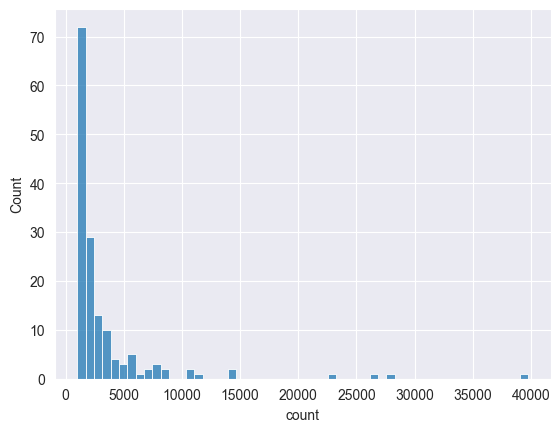

In [157]:
sns.histplot(high_accident_cities)

<Axes: xlabel='count', ylabel='Count'>

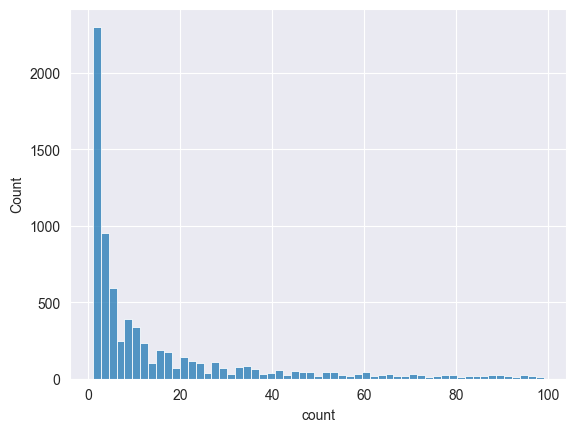

In [158]:
sns.histplot(low_accident_cities)

In [159]:
# There are alos cities which have reported just 1 accident in 4 years.
#This could be an indication of some missing data/ irregularities or the impact of population, per-capitaincome, government spending, average age of city, etc. as hypothesised earlier
cities_by_accident[cities_by_accident == 1]

City
Cadet                 1
Yoncalla              1
Cantua Creek          1
Lower Keys            1
Gladewater            1
                     ..
Mohawk                1
East Bend             1
Princeton Junction    1
Danielsville          1
North Stratford       1
Name: count, Length: 1473, dtype: int64

In [160]:
#checking out an entry
df.Start_Time[0] 

'2016-02-08 05:46:00'

In [161]:
# converting date time to correct format
df.Start_Time = pd.to_datetime(df.Start_Time)

In [162]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [163]:
# Segregating the different aspects of date-time
df.Start_Time[0].day, df.Start_Time[0].month, df.Start_Time[0].year, df.Start_Time[0].hour, df.Start_Time[0].minute, df.Start_Time[0].second

(8, 2, 2016, 5, 46, 0)

In [164]:
#Get the hour of the day for all the data
df.Start_Time.dt.hour

0         5
1         6
2         6
3         7
4         7
         ..
999995    4
999996    4
999997    5
999998    5
999999    5
Name: Start_Time, Length: 1000000, dtype: int32

<Axes: xlabel='Start_Time', ylabel='Density'>

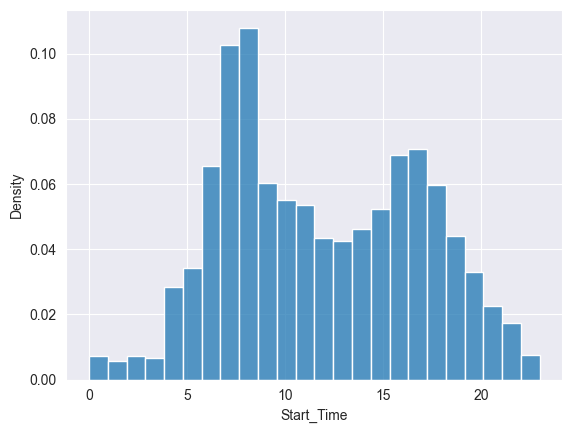

In [165]:
#Plotting the density distribution and count distribution of accidents at each hour of the day
sns.histplot(df.Start_Time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

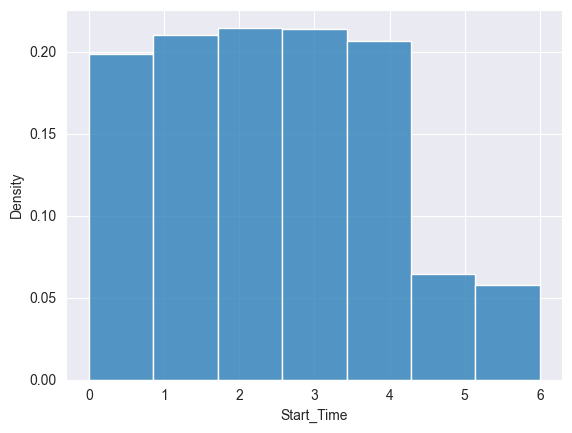

In [166]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=7, stat='density')

In [167]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]

<Axes: xlabel='Start_Time', ylabel='Density'>

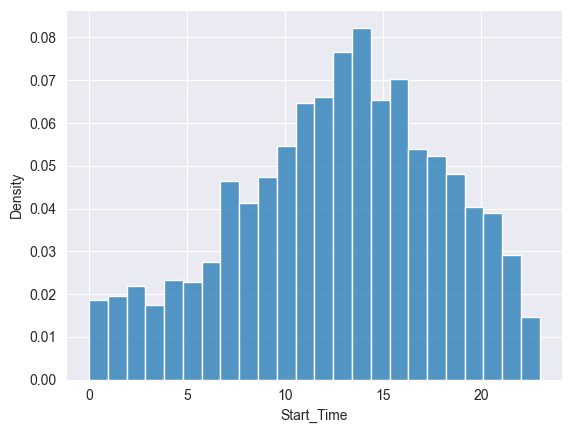

In [168]:
sns.histplot(sundays_start_time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

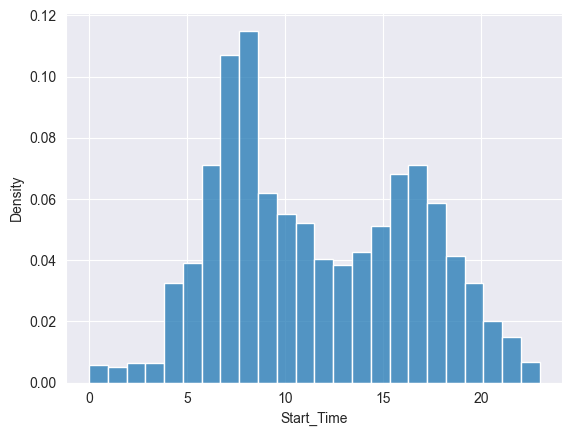

In [169]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(mondays_start_time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

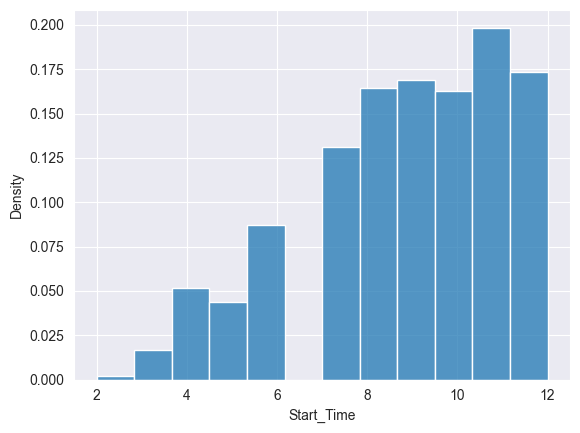

In [170]:
df_particular_year = df[df.Start_Time.dt.year == 2016]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

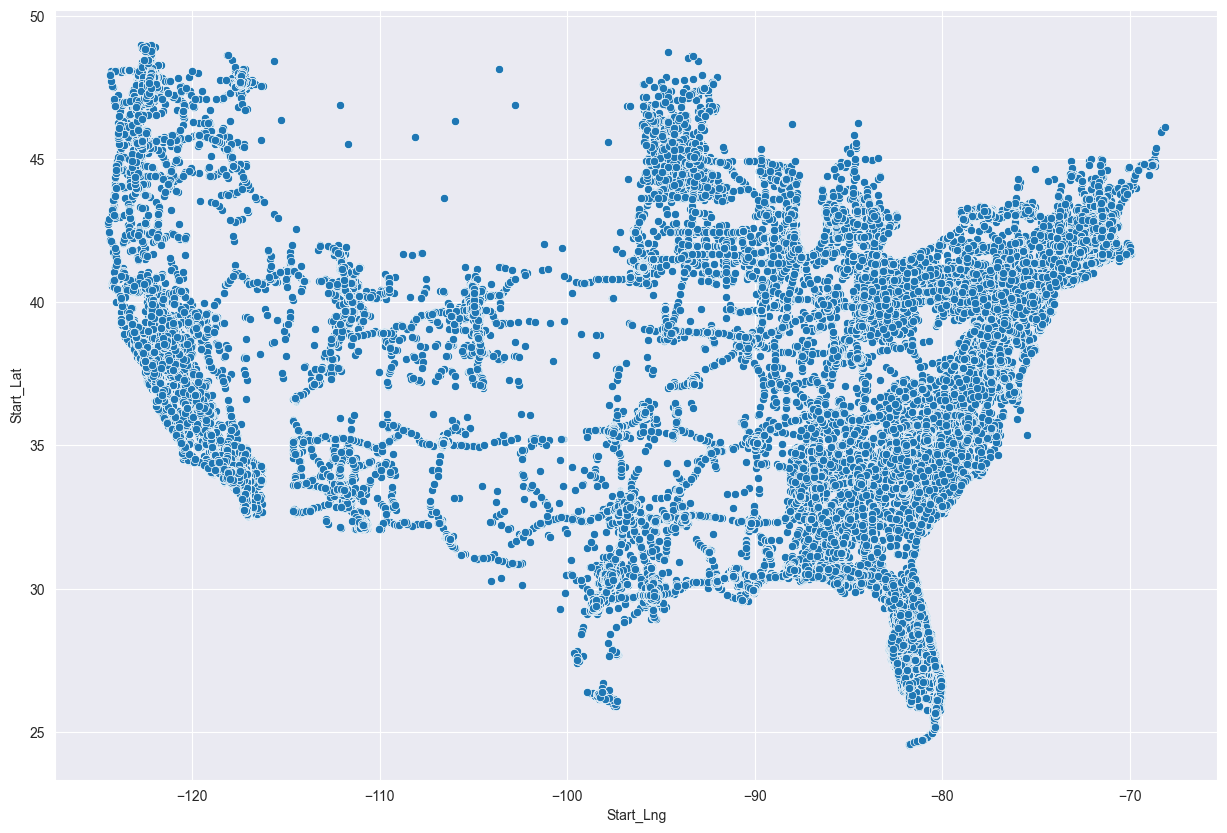

In [120]:
#Plotting the latitudes and longitudes
plt.figure(figsize=(15,10))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

C:\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


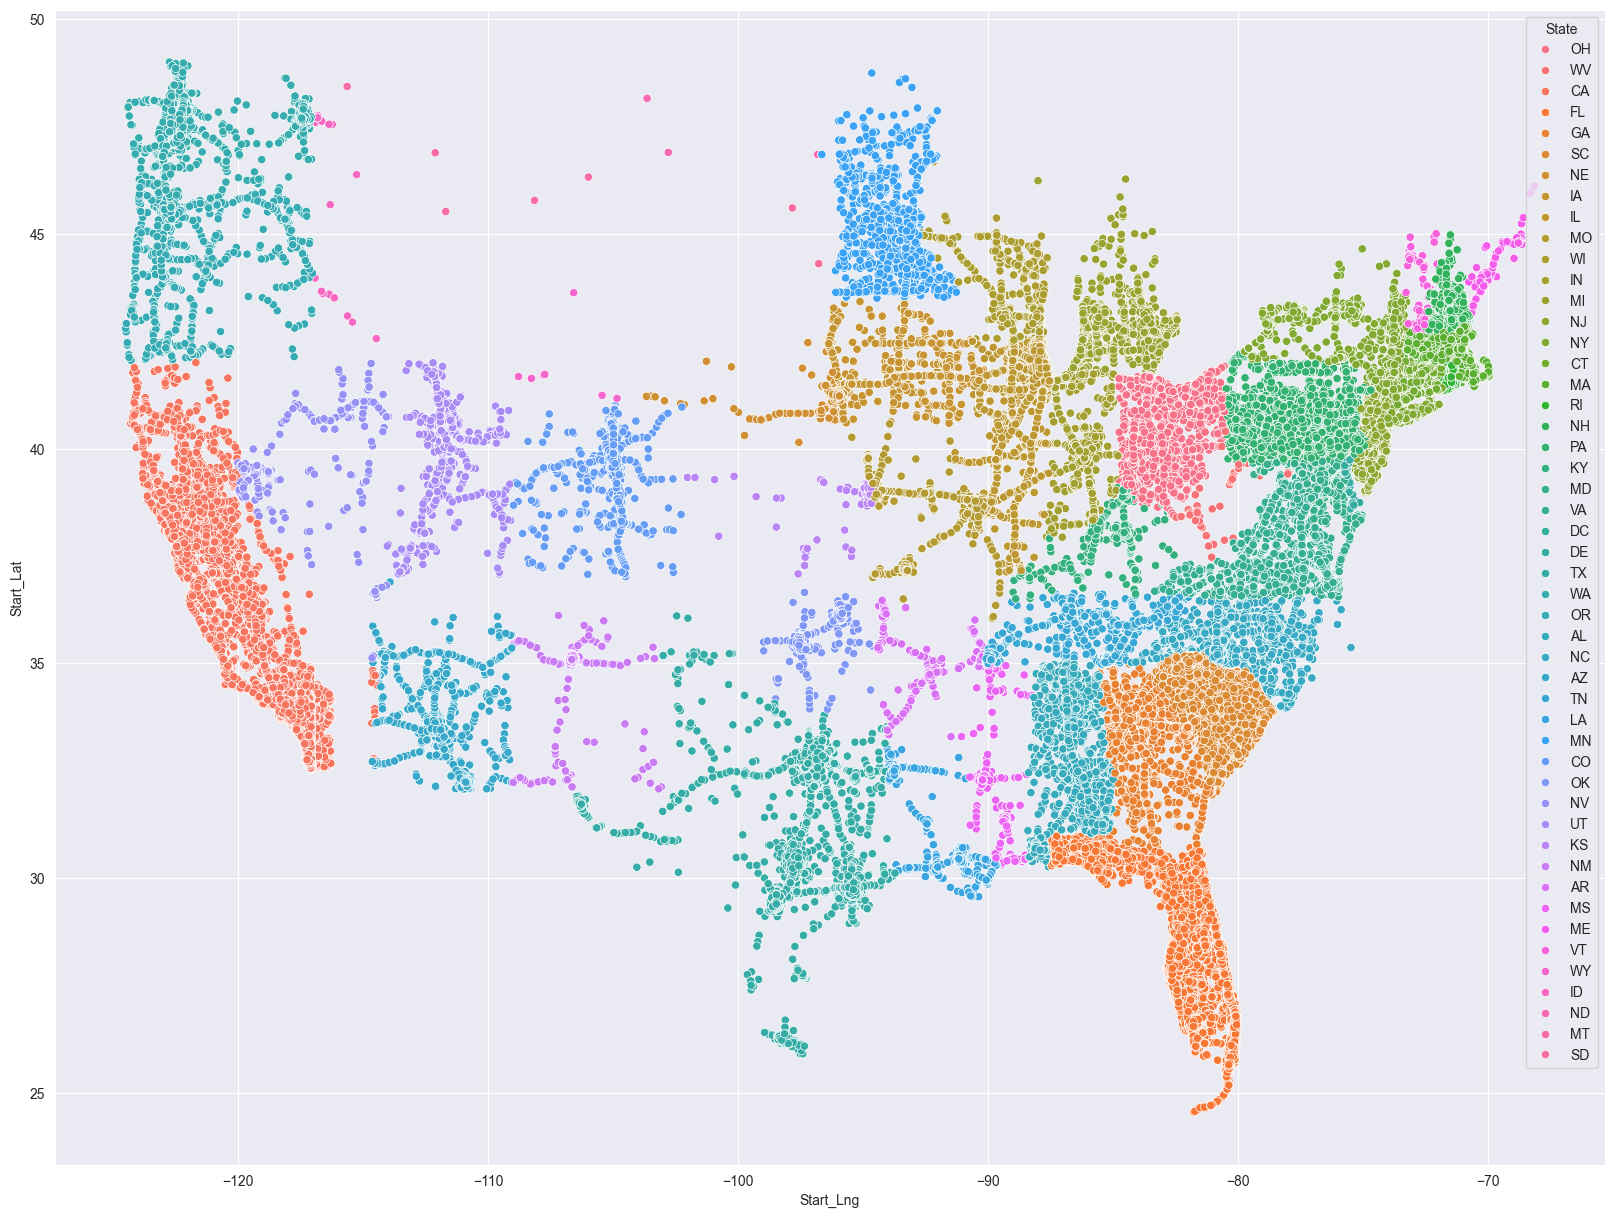

In [121]:
plt.figure(figsize=(20,15))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng, hue=df.State)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

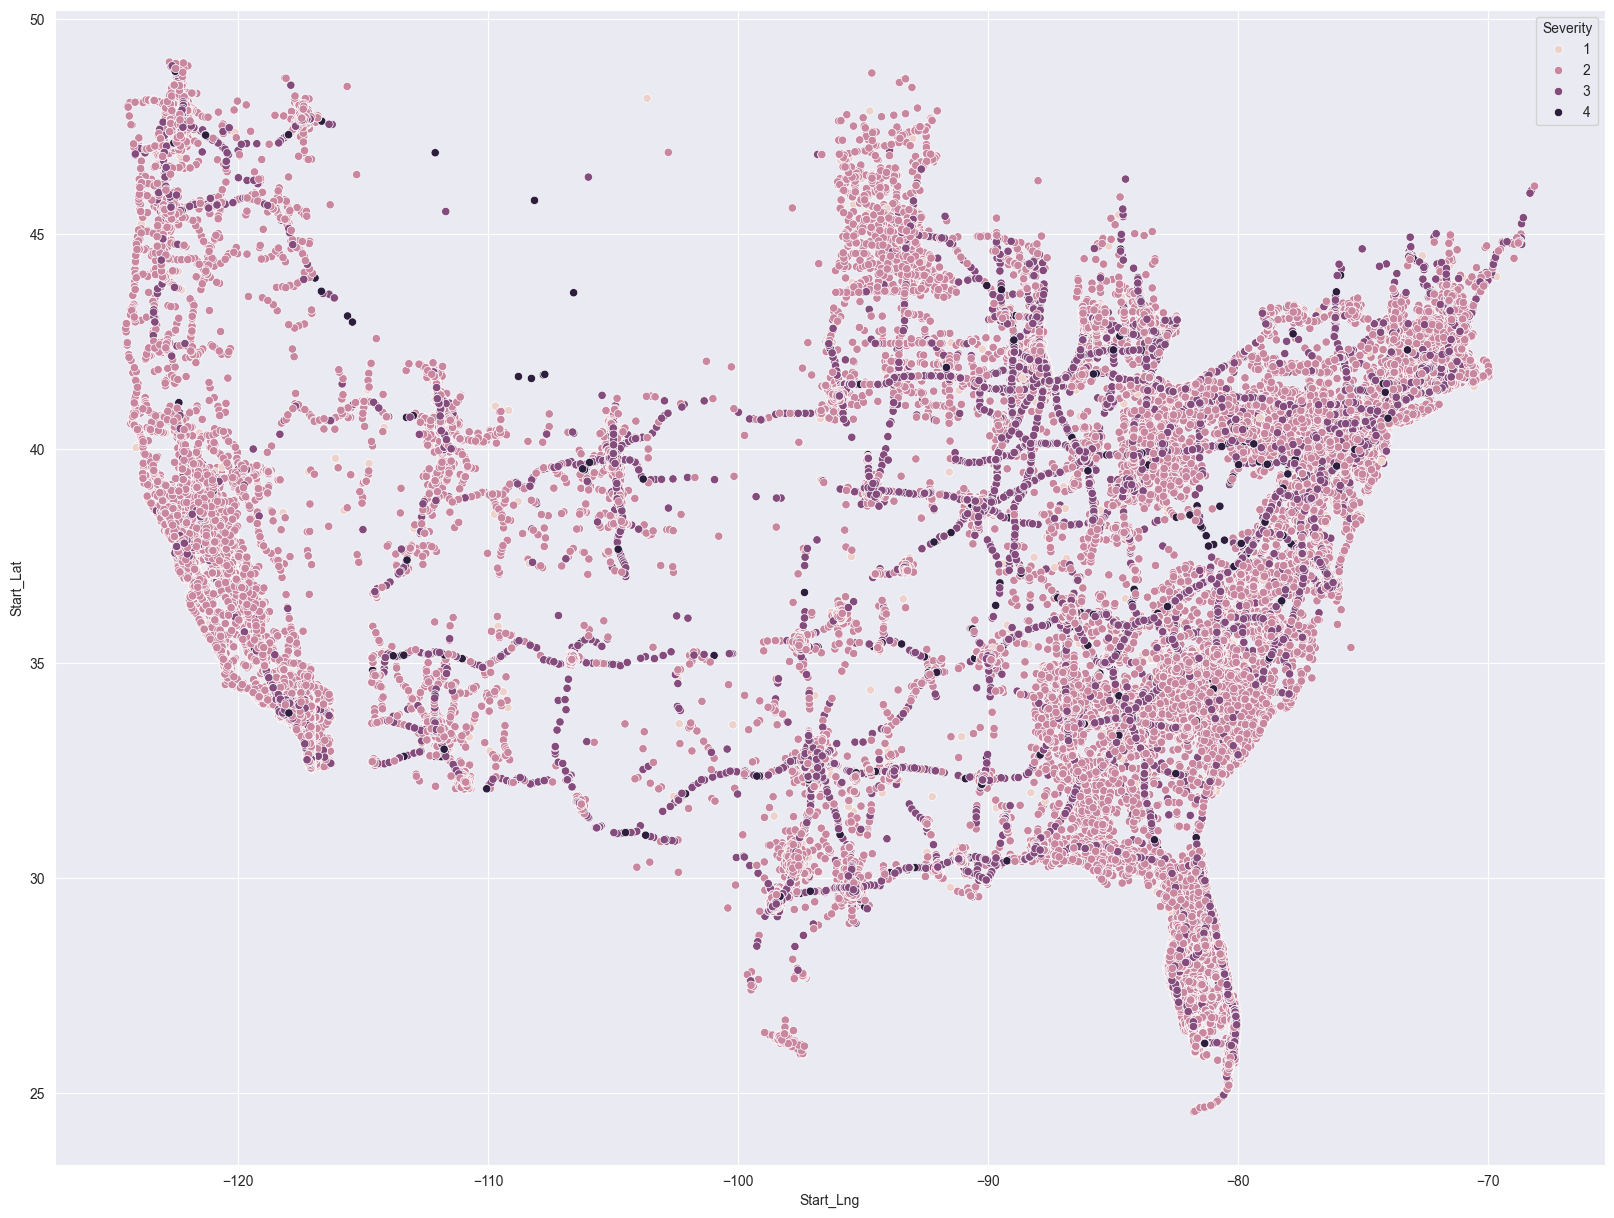

In [122]:
plt.figure(figsize=(20,15))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng, hue=df.Severity)

In [123]:
df.State.value_counts()

State
CA    256244
TX    122752
FL     96380
PA     49406
NY     43114
SC     41131
MI     37564
IL     36415
GA     32170
OH     27999
NC     27113
VA     24193
WA     20803
MA     20293
AL     17270
NJ     17130
MD     15996
TN     12989
LA     10191
NE      9554
AZ      9338
CT      8594
MO      7768
OK      7566
CO      6623
UT      5354
MN      5180
IN      4381
IA      3898
KY      3789
RI      3614
OR      2926
WI      2254
NV      1680
DE      1450
DC      1398
NM      1394
NH      1172
KS      1056
MS       916
AR       491
ME       224
WV        89
VT        89
ID        31
WY         7
MT         5
ND         4
SD         2
Name: count, dtype: int64

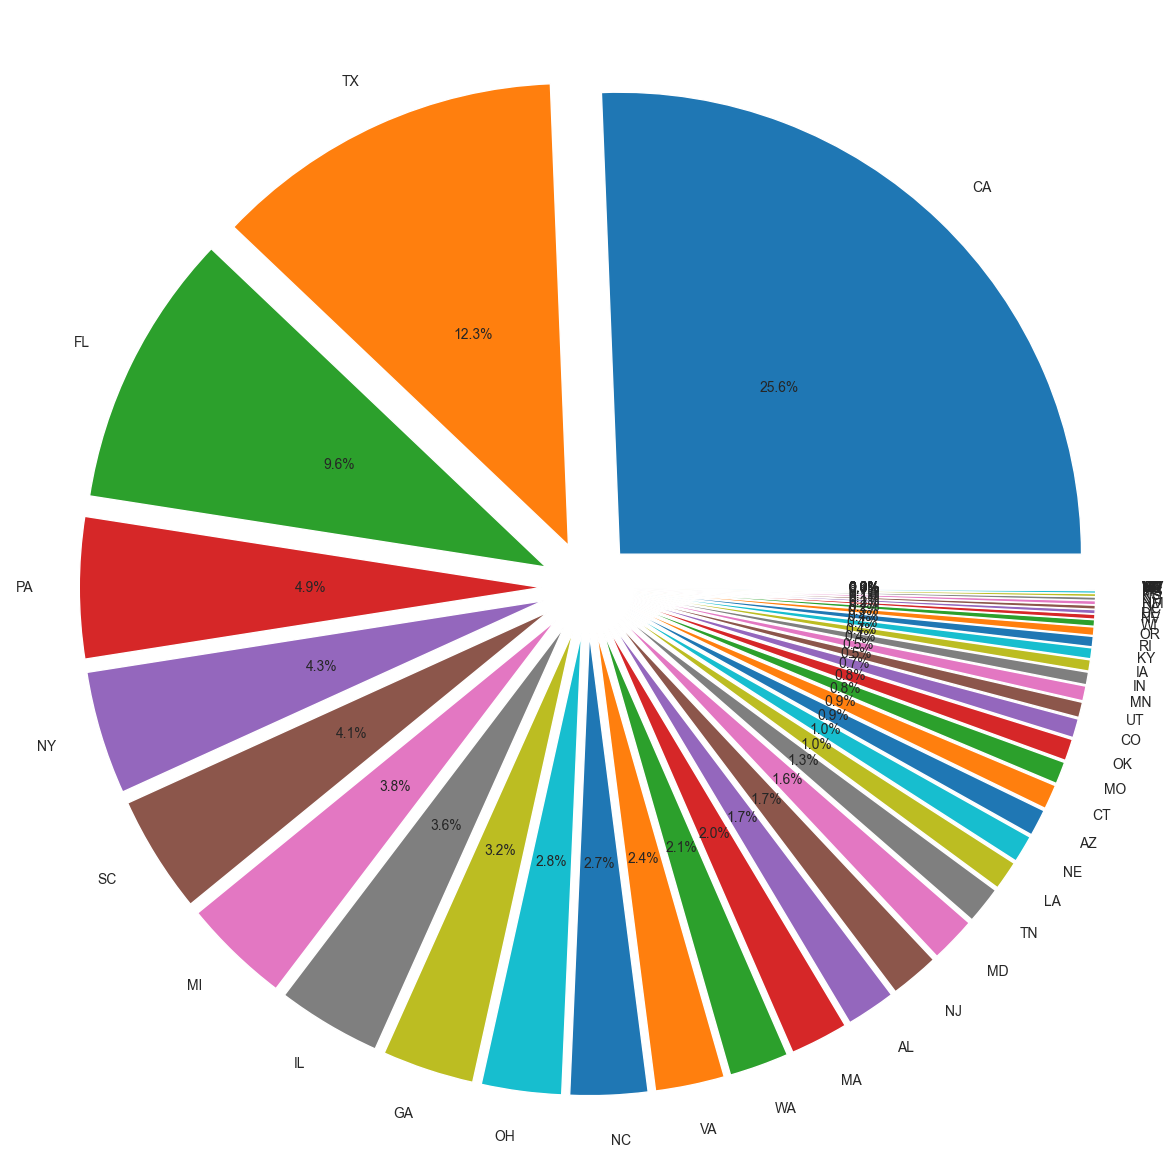

In [124]:
pie, ax = plt.subplots(figsize=[15,15])
labels = df.State.value_counts().keys()
plt.pie(x=df.State.value_counts(), autopct="%.1f%%", explode=[0.1]*len(df.State.value_counts()), labels=labels, pctdistance=0.5)
plt.show();

In [125]:
weather = df.Weather_Condition.value_counts()

In [126]:
weather[weather > 1000]  # Kind of weather when no. of accidents were greater than 1000

Weather_Condition
Fair                            237311
Clear                           208905
Mostly Cloudy                   134344
Partly Cloudy                    93409
Overcast                         80265
Cloudy                           69424
Scattered Clouds                 47595
Light Rain                       41845
Fog                              10837
Haze                              9960
Rain                              9310
Light Snow                        8479
Heavy Rain                        3557
Fair / Windy                      2476
Light Drizzle                     2243
T-Storm                           1874
Thunder in the Vicinity           1835
Light Rain with Thunder           1537
Thunder                           1479
Cloudy / Windy                    1296
Smoke                             1273
Mostly Cloudy / Windy             1230
Light Thunderstorms and Rain      1083
Heavy T-Storm                     1055
Name: count, dtype: int64

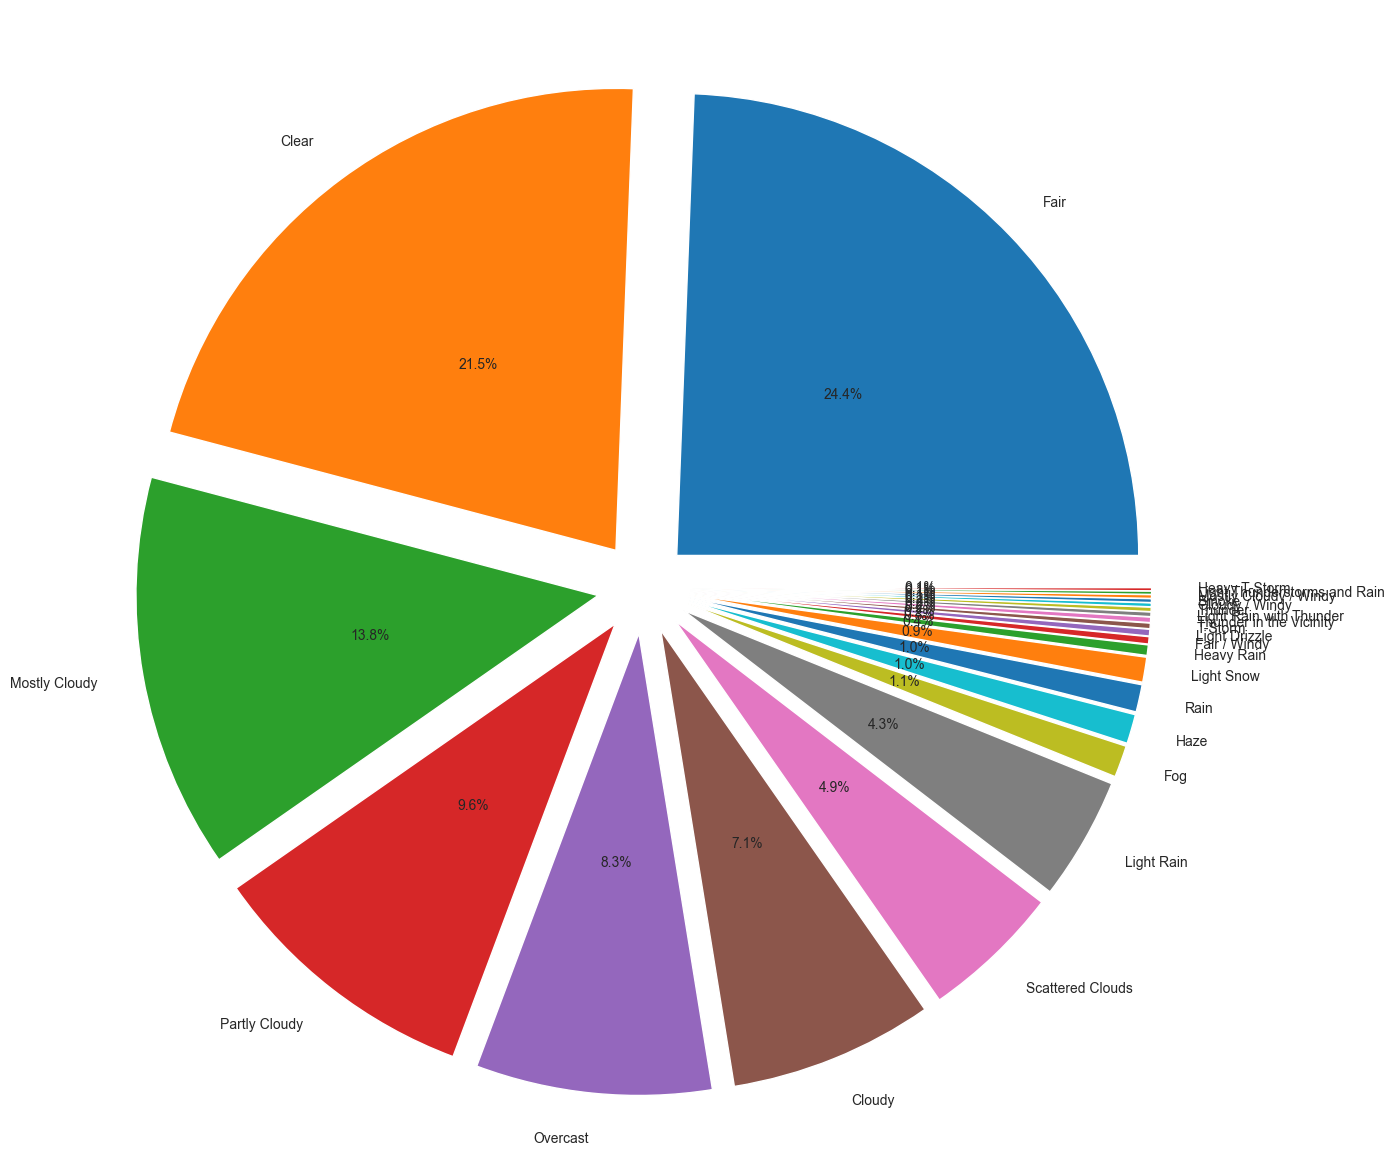

In [127]:
pie, ax = plt.subplots(figsize=[15,15])
labels = weather[weather > 1000].keys()
plt.pie(x=weather[weather > 1000], autopct="%.1f%%", explode=[0.1]*len(weather[weather > 1000]), labels=labels, pctdistance=0.5)
plt.show();

In [128]:
df.Sunrise_Sunset.value_counts()

Sunrise_Sunset
Day      726997
Night    271367
Name: count, dtype: int64

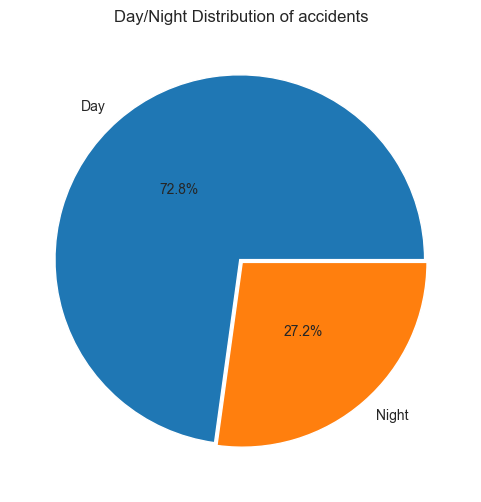

In [129]:
pie, ax = plt.subplots(figsize=[6,6])
labels = df.Sunrise_Sunset.value_counts().keys()
plt.pie(x=df.Sunrise_Sunset.value_counts(), autopct="%.1f%%", explode=[0.01]*len(df.Sunrise_Sunset.value_counts()), labels=labels, pctdistance=0.5)
plt.title("Day/Night Distribution of accidents")
plt.show();

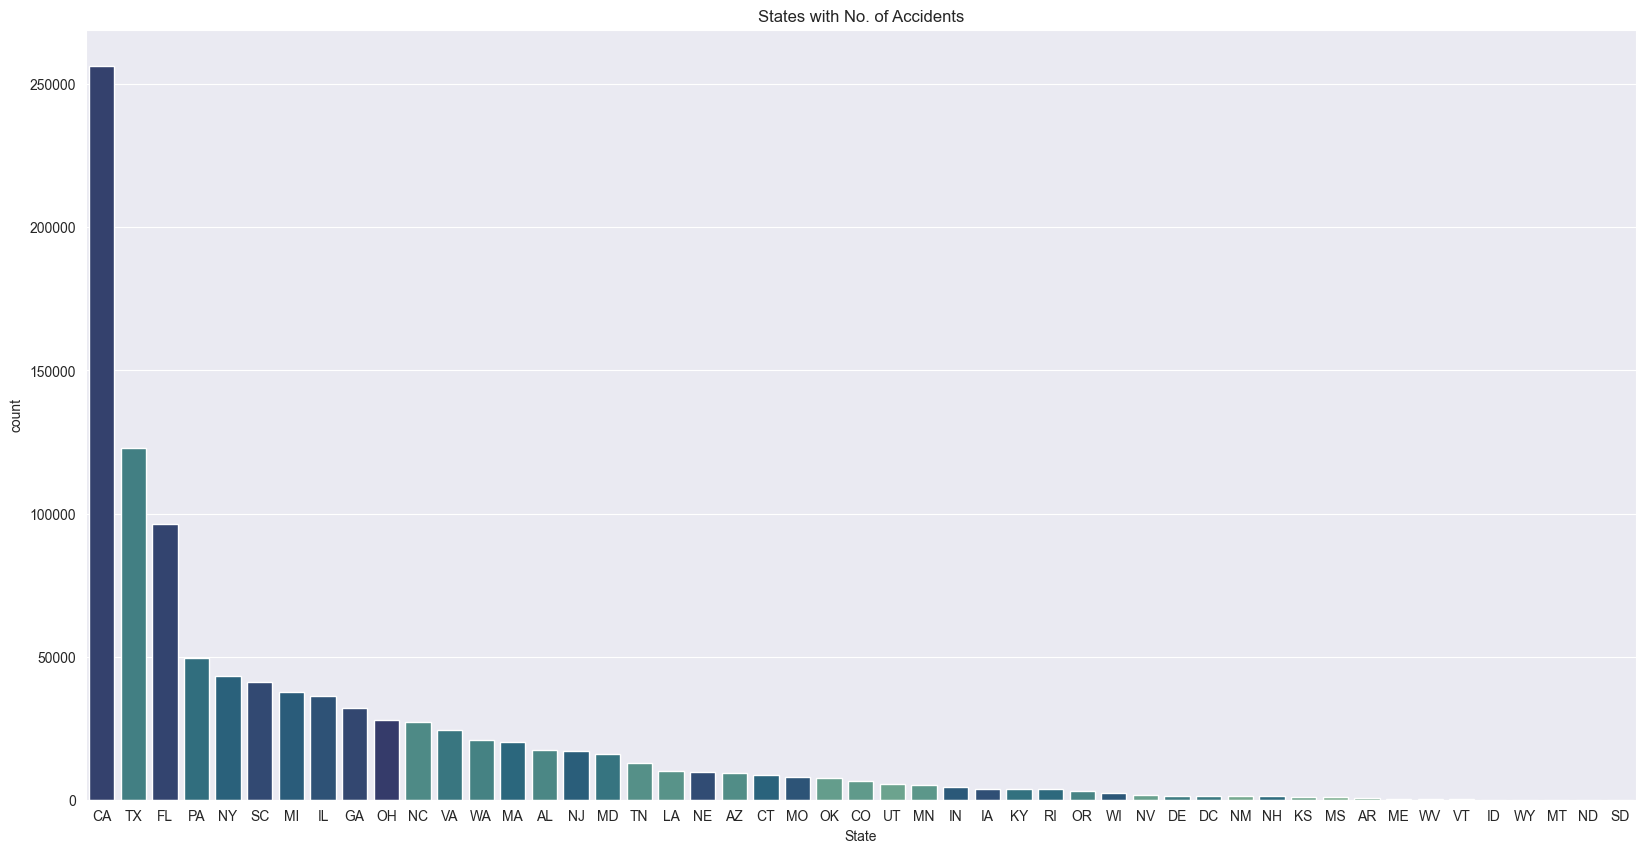

In [130]:
fig, ax = plt.subplots(figsize = (20,10))
c = sns.countplot(x="State", data=df, orient = 'v', palette = "crest_r", order = df['State'].value_counts().index, hue='State')
c.set_title("States with No. of Accidents");